# INSURANCE COMPANY DATA ANALYSIS

# TEAM - 16

## PROBLEM STATEMENT:

One of our clients is an insurance provider that provides health insurance towards its clients' clients. They now need our assistance in developing a model used to determine whether the insured (customers) from the previous year will be interested in the company's vehicle insurance.

An insurance company is a contract whereby a business agrees to guarantee compensation in the event of a specific loss, damage, disease, or death in return for a payment of a predetermined premium. The amount of money which the customer must consistently pay to an insurance provider in exchange for this assurance is known as a premium.

For instance, we might pay a yearly payment of Rs. 5000 for a Rs. 20000/- health insurance policy so that, should the unthinkable happen and we become ill and require hospitalization that year, then insurance provider firm will cover the cost of hospitalization, etc. up to Rs. 200000. The idea of possibilities enters the picture when we wonder how the corporation can afford such large hospitalization bills when it only charges a premium of Rs. 5000.

For instance, 100 consumers, like us, may pay a premium of Rs. 5000 a year, but only a small number of them (let's say 2-3) would end up in the hospital that year. In this sense, each person shares in the danger of the others.
Similar to medical insurance, car insurance requires customers to pay an annual premium to the insurance provider firm in order for them to receive compensation (referred to as the "sum assured") in the event that their vehicle causes an unfortunate accident.

The organization can then organize its communication approach to reach out to those clients and maximize its business model & income by using a model to forecast whether a client would be interested in Vehicle Insurance.


# IMPORTING LIBRARIES:

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# LOADING DATA 

In [183]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [184]:
df_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

# DATA DICTIONARY

# EXPLORATORY DATA ANALYSIS

In [185]:
#shape of train data
df_train.shape

(381109, 12)

In [186]:
#shape of test data
df_test.shape

(127037, 11)

In [187]:
df_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [188]:
df_test.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [189]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [190]:
# Check the column-wise info of the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [191]:
# Get a summary of the dataframe using 'describe()'

df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [192]:
df_test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


## DATA CLEANING

In [193]:
# Get the column-wise Null count using 'is.null()' alongwith the 'sum()' function
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [194]:
df_test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

### There are no null values in our data.

### Attributes classification:

# DATA VISUALIZATION

<AxesSubplot:xlabel='Response', ylabel='count'>

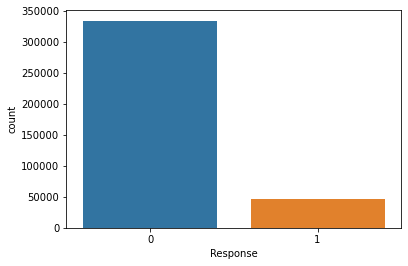

In [195]:
#finding the number of responses
sns.countplot(x = df_train['Response'])

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

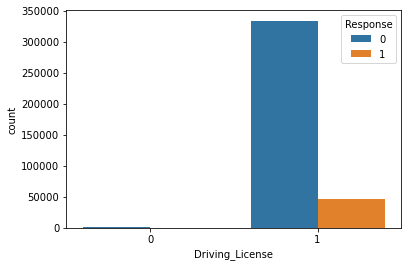

In [196]:
#based on driving license who took insurance
sns.countplot(x = df_train['Driving_License'],hue = df_train['Response'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

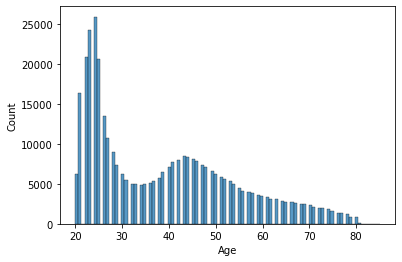

In [197]:
#distibution of age group
sns.histplot(x = df_train['Age'])

In [198]:
#categorizing age groups
df_train['age_group'] = pd.cut(df_train['Age'],bins = [19,40,60,85],labels = ['Adult','Middle_aged','Senior_citizen'])

In [199]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Middle_aged
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Senior_citizen
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Middle_aged
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Adult
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Adult


        age_group  Response  Percent
0           Adult         0   197844
1           Adult         1    18780
2     Middle_aged         0    97505
3     Middle_aged         1    23741
4  Senior_citizen         0    39050
5  Senior_citizen         1     4189


<AxesSubplot:xlabel='age_group', ylabel='Percent'>

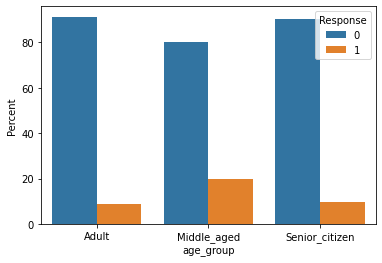

In [200]:
#dividing age_group based on response

z = df_train.groupby(['age_group','Response']).Response.count()

df1 = pd.DataFrame(z)
df1.rename(columns = {'Response':'Percent'},inplace = True)
df1.reset_index(inplace = True)
print(df1)

x = df1.groupby(['age_group','Response']).agg({'Percent':'sum'})
x_pcts = x.groupby(level = 0).apply(lambda x : 100 * x / float(x.sum()))
x_pcts.reset_index(inplace = True)
x_pcts
sns.barplot(x = x_pcts['age_group'],y = x_pcts['Percent'],hue = x_pcts['Response'])

### By this we conclude that middle_aged people having more vehicle_insurance acceptance

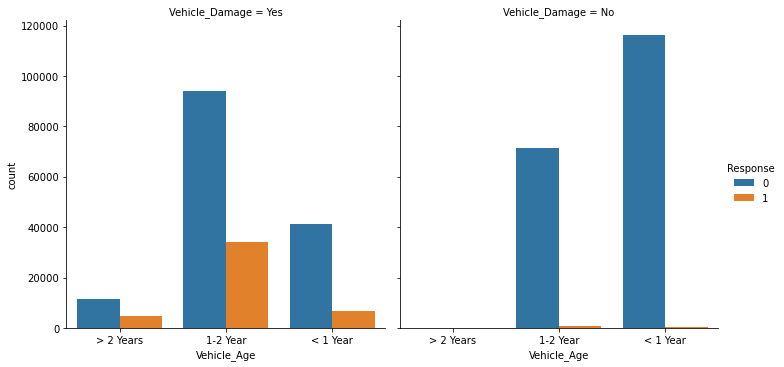

In [201]:
sns.catplot(data = df_train,x = 'Vehicle_Age',col = 'Vehicle_Damage',hue = 'Response',kind = 'count')

### Most of the damaged vehicles are opting for insurance

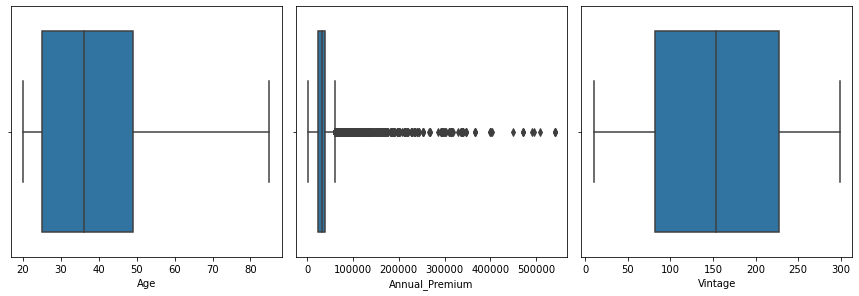

In [202]:
#creating boxplots of numerical features
numerical_features = ['Age','Annual_Premium','Vintage']
plt.figure(figsize=(16,16))
for i, col in enumerate(numerical_features):
    plt.subplot(4,4,i+1)
    sns.boxplot(x = df_train[col])
    plt.tight_layout()

In [203]:
#annual premium have more outliers so who have more than 400000 are set to 400000
df_train.loc[df_train.Annual_Premium> 400000,'Annual_Premium']=400000

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

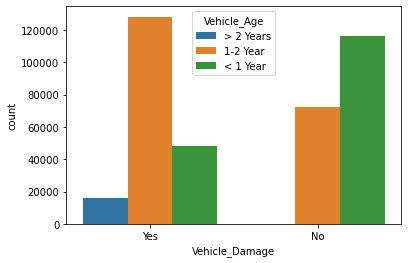

In [204]:
sns.countplot(x = df_train['Vehicle_Damage'],hue = df_train['Vehicle_Age'])

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

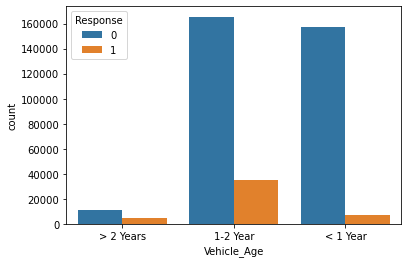

In [205]:
sns.countplot(x = df_train['Vehicle_Age'],hue = df_train['Response'])

### Since the vehicles are provided with a insurance for a year, so it was observed vehicle age between 1-2 years are less opting for vehicle insurance

  Vehicle_Damage  Gender  Percent
0             No  Female    95355
1             No    Male    93341
2            Yes  Female    79665
3            Yes    Male   112748


<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Percent'>

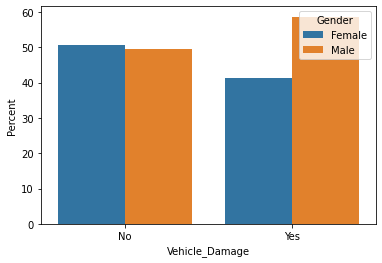

In [206]:
z = df_train.groupby(['Vehicle_Damage','Gender']).Gender.count()

df1 = pd.DataFrame(z)
df1.rename(columns = {'Gender':'Percent'},inplace = True)
df1.reset_index(inplace = True)
print(df1)

x = df1.groupby(['Vehicle_Damage','Gender']).agg({'Percent':'sum'})
x_pcts = x.groupby(level = 0).apply(lambda x : 100 * x / float(x.sum()))
x_pcts.reset_index(inplace = True)
x_pcts
sns.barplot(x = x_pcts['Vehicle_Damage'],y = x_pcts['Percent'],hue = x_pcts['Gender'])



### male has more vehicle damage

   Gender  Response  Percent
0  Female         0   156835
1  Female         1    18185
2    Male         0   177564
3    Male         1    28525


<AxesSubplot:xlabel='Gender', ylabel='Percent'>

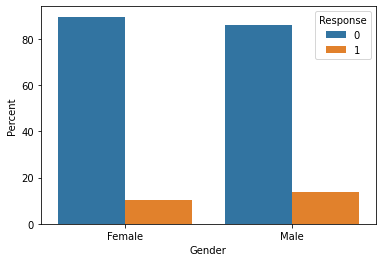

In [207]:
z = df_train.groupby(['Gender','Response']).Response.count()

df1 = pd.DataFrame(z)
df1.rename(columns = {'Response':'Percent'},inplace = True)
df1.reset_index(inplace = True)
print(df1)

x = df1.groupby(['Gender','Response']).agg({'Percent':'sum'})
x_pcts = x.groupby(level = 0).apply(lambda x : 100 * x / float(x.sum()))
x_pcts.reset_index(inplace = True)
x_pcts
sns.barplot(x = x_pcts['Gender'],y = x_pcts['Percent'],hue = x_pcts['Response'])


### vehicle damage is more in male and also they are opting more vehicle insurances

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

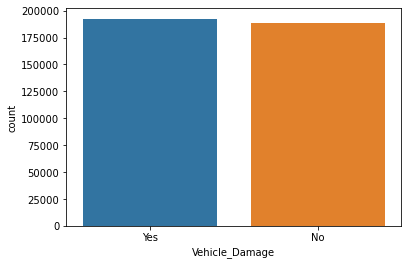

In [208]:
sns.countplot(x = df_train['Vehicle_Damage'])

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Annual_Premium'>

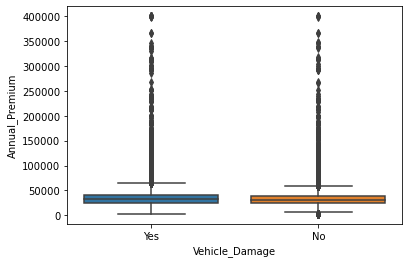

In [209]:
sns.boxplot(y = df_train['Annual_Premium'],x = df_train['Vehicle_Damage'])

# MODELLING

In [210]:
#converting categorical data to numeric data

df_train.loc[df_train['Gender'] == 'Male', 'Gender'] = 1
df_train.loc[df_train['Gender'] == 'Female', 'Gender'] = 0
df_test.loc[df_test['Gender'] == 'Male', 'Gender'] = 1
df_test.loc[df_test['Gender'] == 'Female', 'Gender'] = 0

df_train.loc[df_train['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
df_train.loc[df_train['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
df_train.loc[df_train['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0
df_test.loc[df_test['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
df_test.loc[df_test['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
df_test.loc[df_test['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

df_train.loc[df_train['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
df_train.loc[df_train['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
df_test.loc[df_test['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
df_test.loc[df_test['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

del df_train['age_group']



In [211]:
df_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [212]:
for col in df_train.columns:
    df_train[col] = df_train[col].astype(np.int32)
df_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,2,1,76,1,3,0,1,0,33536,26,183,0
2,3,1,47,1,28,0,2,1,38294,26,27,1
3,4,1,21,1,11,1,0,0,28619,152,203,0
4,5,0,29,1,41,1,0,0,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26,1,1,0,30170,26,88,0
381105,381106,1,30,1,37,1,0,0,40016,152,131,0
381106,381107,1,21,1,30,1,0,0,35118,160,161,0
381107,381108,0,68,1,14,0,2,1,44617,124,74,0


### correlation coefficients with respect to target variable

In [240]:
for col in df_train.columns:
    if(col == 'Response'):
        continue
    print(col,df_train[col].corr(df_train['Response']),sep = ' -> ')

id -> -0.0013681501902185343
Gender -> 0.05243991377134212
Age -> 0.11114689471250998
Driving_License -> 0.01015517459407383
Region_Code -> 0.010569855615223151
Previously_Insured -> -0.3411704626135235
Vehicle_Age -> 0.22187398721799095
Vehicle_Damage -> 0.3543995438797571
Annual_Premium -> 0.022560436893296315
Policy_Sales_Channel -> -0.13904150082916103
Vintage -> -0.001050372001989886


In [214]:
y = df_train['Response']
X = df_train.drop(['Response'],axis = 1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
print('Positive cases % in validation set: ', round(100 * len(y_test[y_test == 1]) / len(y_test), 3), '%')
print('Positive cases % in train set: ', round(100 * len(y_train[y_train == 1]) / len(y_train), 3), '%')

Positive cases % in validation set:  12.343 %
Positive cases % in train set:  12.235 %


In [215]:
#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model Selection and Metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier, reset_parameter
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, precision_score, auc, roc_curve

# Hyperparamter Tuning
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [216]:
model = {
    "Decision Tree": DecisionTreeClassifier(), 
    "SGD" : SGDClassifier(), 
    "Random Forest" : RandomForestClassifier(), 
    "Gradient Boosting" : GradientBoostingClassifier(),
    "XGBoost" : XGBClassifier(),
    "CatBoost" : CatBoostClassifier(),
    "LGBM" : LGBMClassifier()
        }

In [217]:
scores = []
prob_score = {}
for mod in model:
    classifier = model[mod]
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    try:
        score = classifier.predict_proba(X_test)[:,1]
        roc = roc_auc_score(y_test, score, average='weighted')
        prob_score[mod] = score
    except:
        roc = 0
    scores.append([
        mod,
        accuracy_score(y_test, pred),
        f1_score(y_test, pred, average='weighted'),
        precision_score(y_test, pred, average='weighted'),
        recall_score(y_test, pred, average='weighted'),
        roc
    ])

Learning rate set to 0.118484
0:	learn: 0.5062296	total: 31.7ms	remaining: 31.6s
1:	learn: 0.4059633	total: 58.2ms	remaining: 29s
2:	learn: 0.3541783	total: 85.8ms	remaining: 28.5s
3:	learn: 0.3254303	total: 112ms	remaining: 27.8s
4:	learn: 0.3079701	total: 139ms	remaining: 27.6s
5:	learn: 0.2977458	total: 165ms	remaining: 27.3s
6:	learn: 0.2908512	total: 193ms	remaining: 27.3s
7:	learn: 0.2858647	total: 219ms	remaining: 27.1s
8:	learn: 0.2819428	total: 245ms	remaining: 27s
9:	learn: 0.2793097	total: 270ms	remaining: 26.7s
10:	learn: 0.2773100	total: 297ms	remaining: 26.7s
11:	learn: 0.2754237	total: 323ms	remaining: 26.6s
12:	learn: 0.2743294	total: 349ms	remaining: 26.5s
13:	learn: 0.2728419	total: 375ms	remaining: 26.4s
14:	learn: 0.2721737	total: 403ms	remaining: 26.4s
15:	learn: 0.2712108	total: 430ms	remaining: 26.4s
16:	learn: 0.2705223	total: 456ms	remaining: 26.4s
17:	learn: 0.2700126	total: 483ms	remaining: 26.3s
18:	learn: 0.2696228	total: 507ms	remaining: 26.2s
19:	learn: 0

In [219]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','Precision','Recall','ROC AUC'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df.style.apply(highlight_max)

,Accuracy,F1 Score,Precision,Recall,ROC AUC
Decision Tree,0.823253,0.825209,0.827237,0.823253,0.603014
SGD,0.665215,0.719166,0.815302,0.665215,0.000000
Random Forest,0.872386,0.833567,0.826456,0.872386,0.842016
Gradient Boosting,0.876532,0.818998,0.813290,0.876532,0.856168
XGBoost,0.875745,0.823689,0.823989,0.875745,0.856080
CatBoost,0.875456,0.825806,0.825416,0.875456,0.856620
LGBM,0.875863,0.819191,0.798187,0.875863,0.857010


In [220]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}



clf = LGBMClassifier(max_depth=-1, random_state=15, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=100,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=15,
    verbose=True)


# Uncomment to perform Randomsearch
# gs.fit(X_train, y_train, **fit_params)
# print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Randomsearch_params = {'colsample_bytree': 0.6261473679815167, 'min_child_samples': 237, 'min_child_weight': 0.001, 'num_leaves': 28, 'reg_alpha': 10, 'reg_lambda': 10, 'subsample': 0.7567691135431514} 

In [221]:
def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

#set optimal parameters
clf_sw = LGBMClassifier(**clf.get_params())
clf_sw.set_params(**Randomsearch_params)
clf_sw.fit(X_train,y_train, **fit_params, callbacks=[reset_parameter(learning_rate=learning_rate_010_decay_power_0995)])

[100]	valid's auc: 0.857944
[200]	valid's auc: 0.858215


LGBMClassifier(colsample_bytree=0.6261473679815167, metric='None',
               min_child_samples=237, n_estimators=5000, n_jobs=4,
               num_leaves=28, random_state=15, reg_alpha=10, reg_lambda=10,
               silent=True, subsample=0.7567691135431514)

In [227]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [235]:
Y_pred = model.predict(X_test)
print(model.score(X_test,y_test))

0.876571068720317


<function confusion_matrix at 0x00000199A57AC310>


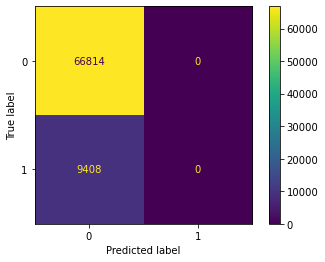

In [232]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)
print(confusion_matrix)

precision ratio according to confusion matrix = (TP)/(TP + FP) = 66814/(66814+9408) = 0.88 

recall ratio = (TP)/(TP+FN) = (66814)/(66814 + 0) = 1

In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66814
           1       0.00      0.00      0.00      9408

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



In [ ]:
pd.concat(X_train,x_test)

# BUSINESS RECOMMENDATIONS:

#### The customers with vehicle damaged are more opting  vehicle insurance

#### The customers with a age between 40-60 years are more opting vehicle insurance

#### vehicle age with less than 1 year are less opting for vehicle insurance since they could be having insurance servicing by the company

# -------------------------------------THANK YOU----------------------------------------------